In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

import os
root_path = os.path.dirname(os.path.abspath(''))
docs_path = os.path.join(root_path, "docs")
docs_imagens_path = os.path.join(docs_path, "imagens")
print(docs_imagens_path)

x:\Git\b3-invest\docs\imagens


In [6]:
df = pd.read_parquet('df_experiments.parquet')
df_consolidado = pd.read_parquet('df_consolidado.parquet')

## 1 day

In [7]:
df_1_day = df[df['experiment'] == '1_day'].copy()

df_1_day_top = df_1_day[
    (df_1_day['ticker_rmse'] == df_1_day['ticker_rmse'].min())
    | (df_1_day['ticker_rmse'] == df_1_day['ticker_rmse'].max())
].copy()

## 7 days

In [8]:
df_7_days = df[df['experiment'] == '7_days'].copy()

# Remover TICKERS que não possuem a quantidade correta de dias
df_7_days_group = df_7_days.groupby(['model','model_type', 'ticker']).count().reset_index()
avaiable_tickers_7_days = list(df_7_days_group[df_7_days_group['experiment'] == 7]['ticker'].unique())
print(f"{len(avaiable_tickers_7_days)} tickers of {len(df_7_days['ticker'].unique())}")

print(f'before: {df_7_days.shape}')
df_7_days = df_7_days[df_7_days['ticker'].isin(avaiable_tickers_7_days)].copy()
print(f'after: {df_7_days.shape}')

82 tickers of 89
before: (4816, 8)
after: (4592, 8)


In [9]:
df_7_days_top = df_7_days[
    (df_7_days['ticker_rmse'] == df_7_days['ticker_rmse'].min())
    | (df_7_days['ticker_rmse'] == df_7_days['ticker_rmse'].max())
].copy()


df_7_days_best = df_7_days[
    (df_7_days['ticker_rmse'] == df_7_days['ticker_rmse'].min())
].copy()

df_7_days_worst = df_7_days[
    (df_7_days['ticker_rmse'] == df_7_days['ticker_rmse'].max())
].copy()

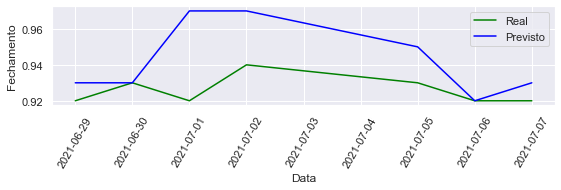

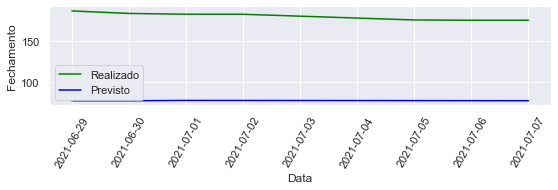

In [10]:
fig, ax = plt.subplots(figsize=(9, 4))
ax.grid(True)

plt.subplot(211)
plt.plot(
    df_7_days_best['date'], 
    df_7_days_best['close'],
    color='green', 
    label="Real"
)

plt.plot(
    df_7_days_best['date'], 
    df_7_days_best['predicted'], 
    color='blue', 
    label="Previsto"
)

plt.xticks(rotation=60)
plt.ylabel("Fechamento")
plt.xlabel("Data")
# plt.title("Histórico de fechamento diário para a ação DMMO3")
plt.legend()
plt.show()

fig.savefig(
    os.path.join(docs_imagens_path, "7_days_best.jpeg"),
    bbox_inches="tight",
)


fig, ax = plt.subplots(figsize=(9, 4))
ax.grid(True)
plt.subplot(211)
plt.plot(
    df_7_days_worst['date'], 
    df_7_days_worst['close'], 
    color='green',
    label="Realizado"
)

plt.plot(
    df_7_days_worst['date'], 
    df_7_days_worst['predicted'], 
    color='blue',
    label="Previsto"
)

plt.xticks(rotation=60)
plt.ylabel("Fechamento")
plt.xlabel("Data")
# plt.title("Histórico de fechamento diário para a ação CEBR3")
plt.legend()
plt.show()

fig.savefig(
    os.path.join(docs_imagens_path, "7_days_worst.jpeg"),
    bbox_inches="tight",
)


## 14 days

In [11]:
df_14_days = df[df['experiment'] == '14_days'].copy()

# Remover TICKERS que não possuem a quantidade correta de dias
df_14_days_group = df_14_days.groupby(['model','model_type', 'ticker']).count().reset_index()
avaiable_tickers_14_days = list(df_14_days_group[df_14_days_group['experiment'] == 14]['ticker'].unique())
print(f"{len(avaiable_tickers_14_days)} tickers of {len(df_14_days_group['ticker'].unique())}")

print(f'before: {df_14_days.shape}')
df_14_days = df_14_days[df_14_days['ticker'].isin(avaiable_tickers_14_days)].copy()
print(f'after: {df_14_days.shape}')

81 tickers of 90
before: (9608, 8)
after: (9072, 8)


In [12]:
df_14_days_top = df_14_days[
    (df_14_days['ticker_rmse'] == df_14_days['ticker_rmse'].min())
    | (df_14_days['ticker_rmse'] == df_14_days['ticker_rmse'].max())
].copy()


df_14_days_best = df_14_days[
    (df_14_days['ticker_rmse'] == df_14_days['ticker_rmse'].min())
].copy()

df_14_days_worst = df_14_days[
    (df_14_days['ticker_rmse'] == df_14_days['ticker_rmse'].max())
].copy()

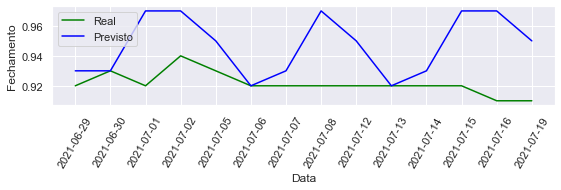

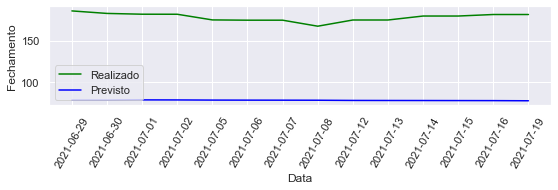

In [13]:
# Cast para str para o matplot não surtar e pular as datas
df_14_days_best['date'] = df_14_days_best['date'].astype(str)
df_14_days_worst['date'] = df_14_days_worst['date'].astype(str)

fig, ax = plt.subplots(figsize=(9, 4))
ax.grid(True)

plt.subplot(211)
plt.plot(
    df_14_days_best['date'], 
    df_14_days_best['close'],
    color='green', 
    label="Real"
)

plt.plot(
    df_14_days_best['date'], 
    df_14_days_best['predicted'], 
    color='blue', 
    label="Previsto"
)

plt.xticks(df_14_days_best['date'].astype(str), rotation=60)
plt.ylabel("Fechamento")
plt.xlabel("Data")
# plt.title("Histórico de fechamento diário para a ação DMMO3")
plt.legend()
plt.show()

fig.savefig(
    os.path.join(docs_imagens_path, "14_days_best.jpeg"),
    bbox_inches="tight",
)


fig, ax = plt.subplots(figsize=(9, 4))
ax.grid(True)
plt.subplot(211)
plt.plot(
    df_14_days_worst['date'], 
    df_14_days_worst['close'], 
    color='green',
    label="Realizado"
)



plt.plot(
    df_14_days_worst['date'], 
    df_14_days_worst['predicted'], 
    color='blue',
    label="Previsto"
)

plt.xticks(df_14_days_worst['date'].astype(str), rotation=60)
plt.ylabel("Fechamento")
plt.xlabel("Data")
# plt.title("Histórico de fechamento diário para a ação CEBR3")
plt.legend()
plt.show()

fig.savefig(
    os.path.join(docs_imagens_path, "14_days_worst.jpeg"),
    bbox_inches="tight",
)


## 28 days

In [14]:
df_28_days = df[df['experiment'] == '28_days'].copy()

# Remover TICKERS que não possuem a quantidade correta de dias
df_28_days_group = df_28_days.groupby(['model','model_type', 'ticker']).count().reset_index()
avaiable_tickers_28_days = list(df_28_days_group[df_28_days_group['experiment'] == 28]['ticker'].unique())
print(f"{len(avaiable_tickers_28_days)} tickers of {len(df_28_days_group['ticker'].unique())}")

print(f'before: {df_28_days.shape}')
df_28_days = df_28_days[df_28_days['ticker'].isin(avaiable_tickers_28_days)].copy()
print(f'after: {df_28_days.shape}')

79 tickers of 90
before: (19168, 8)
after: (17696, 8)


In [15]:
df_28_days_best = df_28_days[
    (df_28_days['ticker_rmse'] == df_28_days['ticker_rmse'].min())
].copy()

df_28_days_worst = df_28_days[
    (df_28_days['ticker_rmse'] == df_28_days['ticker_rmse'].max())
].copy()

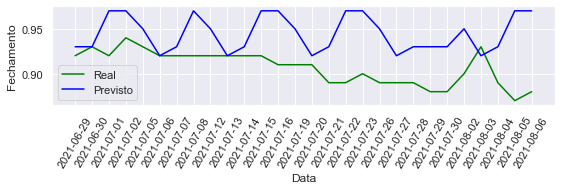

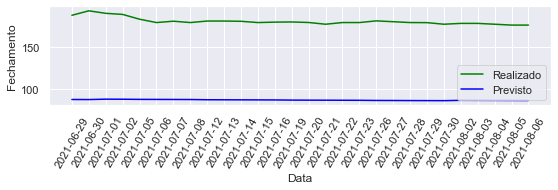

In [16]:
# Cast para str para o matplot não surtar e pular as datas
df_28_days_best['date'] = df_28_days_best['date'].astype(str)
df_28_days_worst['date'] = df_28_days_worst['date'].astype(str)

fig, ax = plt.subplots(figsize=(9, 4))
ax.grid(True)

plt.subplot(211)
plt.plot(
    df_28_days_best['date'], 
    df_28_days_best['close'],
    color='green', 
    label="Real"
)

plt.plot(
    df_28_days_best['date'], 
    df_28_days_best['predicted'], 
    color='blue', 
    label="Previsto"
)

plt.xticks(df_28_days_best['date'].astype(str), rotation=60)
plt.ylabel("Fechamento")
plt.xlabel("Data")
# plt.title("Histórico de fechamento diário para a ação DMMO3")
plt.legend()
plt.show()

fig.savefig(
    os.path.join(docs_imagens_path, "28_days_best.jpeg"),
    bbox_inches="tight",
)


fig, ax = plt.subplots(figsize=(9, 4))
ax.grid(True)
plt.subplot(211)
plt.plot(
    df_28_days_worst['date'], 
    df_28_days_worst['close'], 
    color='green',
    label="Realizado"
)



plt.plot(
    df_28_days_worst['date'], 
    df_28_days_worst['predicted'], 
    color='blue',
    label="Previsto"
)

plt.xticks(df_28_days_worst['date'].astype(str), rotation=60)
plt.ylabel("Fechamento")
plt.xlabel("Data")
# plt.title("Histórico de fechamento diário para a ação CEBR3")
plt.legend()
plt.show()

fig.savefig(
    os.path.join(docs_imagens_path, "28_days_worst.jpeg"),
    bbox_inches="tight",
)


---

In [38]:
df_28_days.head()

,experiment,model,model_type,ticker,date,close,predicted,ticker_rmse
521,28_days,decision_tree_regressor,with_features,AALR3,2021-06-29,11.28,10.75,1.1202
522,28_days,decision_tree_regressor,with_features,AALR3,2021-06-30,11.76,10.20,1.1202
523,28_days,decision_tree_regressor,with_features,AALR3,2021-07-01,12.46,10.64,1.1202
524,28_days,decision_tree_regressor,with_features,AALR3,2021-07-02,11.96,10.64,1.1202
525,28_days,decision_tree_regressor,with_features,AALR3,2021-07-05,11.78,10.16,1.1202


In [59]:
group = ['model', 'model_type', 'ticker']
target = ['close']

df_28_days_mean = df_28_days[group + target].groupby(by=group).mean().reset_index()

df_28_days_mean = df_28_days_mean.merge(
    df_28_days[group + ['ticker_rmse']],
    on=group
)

df_28_days_mean = df_28_days_mean.drop_duplicates()

df_28_days_mean = df_28_days_mean.sort_values(by='close')

<AxesSubplot:>

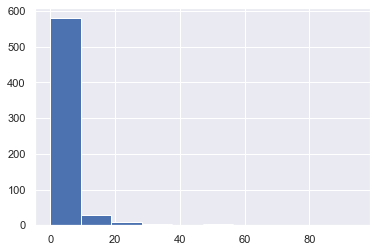

In [73]:
df_28_days_mean['ticker_rmse'].hist()

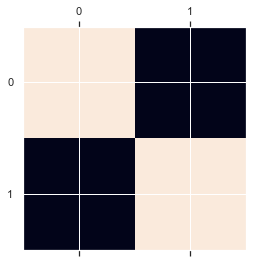

In [71]:
plt.matshow(df_28_days_mean[['close', 'ticker_rmse']].corr())
plt.show()

<AxesSubplot:>

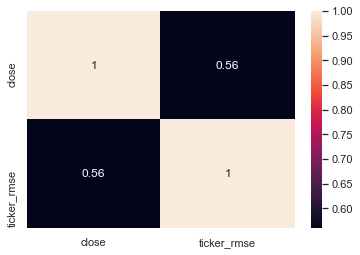

In [72]:
sns.heatmap(df_28_days_mean[['close', 'ticker_rmse']].corr(), annot=True)